<a href="https://colab.research.google.com/github/Jaoz7926/ML/blob/main/13_KMEANS_Clustering_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 導入必要的庫
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# 讀取數據
dataframe = pd.read_csv('https://raw.githubusercontent.com/chihleebobo/0511/main/ClusteringHSS.csv')
print(dataframe.head())

   ID Gender_Code Region  Income  Spending
0   1      Female  Rural    20.0      15.0
1   2        Male  Rural     5.0      12.0
2   3      Female  Urban    28.0      18.0
3   4        Male  Urban    40.0      10.0
4   5        Male  Urban    42.0       9.0


In [7]:
# 檢查缺失值、數據形狀、欄位名稱和數據類型
print("缺失值數量:", dataframe.isnull().values.sum())
print("數據集形狀:", dataframe.shape)
print("欄位名稱:", dataframe.keys())
print("第一筆數據內容:", dataframe.iloc[0, :])
print("數據類型:\n", dataframe.dtypes)

缺失值數量: 23
數據集形狀: (1113, 5)
欄位名稱: Index(['ID', 'Gender_Code', 'Region', 'Income', 'Spending'], dtype='object')
第一筆數據內容: ID                  1
Gender_Code    Female
Region          Rural
Income           20.0
Spending         15.0
Name: 0, dtype: object
數據類型:
 ID               int64
Gender_Code     object
Region          object
Income         float64
Spending       float64
dtype: object


In [8]:
# 刪除缺失值
dataframe.dropna(inplace=True)

# 編碼類別變量
label_enc1 = LabelEncoder()
dataframe.loc[:, 'Gender_Code'] = label_enc1.fit_transform(dataframe['Gender_Code'])
label_enc2 = LabelEncoder()
dataframe.loc[:, 'Region'] = label_enc2.fit_transform(dataframe['Region'])

# 移除 ID 欄，準備特徵
X = dataframe.drop(['ID'], axis=1)
print(X.head())

  Gender_Code Region  Income  Spending
0           0      0    20.0      15.0
1           1      0     5.0      12.0
2           0      1    28.0      18.0
3           1      1    40.0      10.0
4           1      1    42.0       9.0


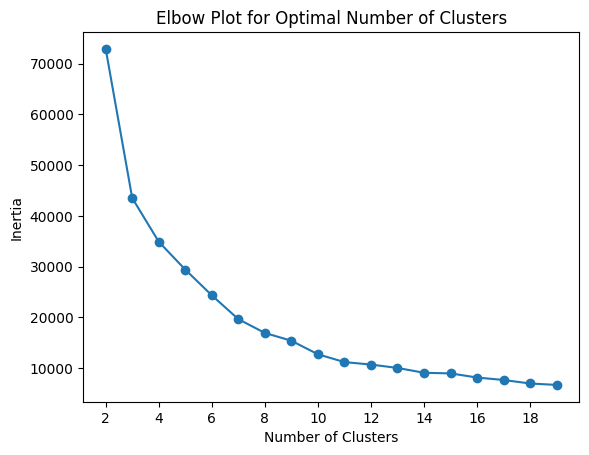

In [9]:
# 計算不同群數的慣性
inertia = []
for i in range(2, 20):
    model = KMeans(init="k-means++", n_clusters=i, random_state=0)
    model.fit(X)
    inertia.append(model.inertia_)

# 繪製肘部圖
plt.plot(range(2, 20), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 20, 2))
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

群中心:
 [[5.10344828e-01 2.55172414e-01 2.25586207e+01 1.15310345e+01]
 [5.43859649e-01 1.00000000e+00 3.35175439e+01 1.10921053e+01]
 [4.74777448e-01 4.16333634e-15 1.05786350e+01 1.09258160e+01]
 [5.61702128e-01 1.00000000e+00 4.51617021e+01 1.14595745e+01]]

每個群的平均值:
                  ID Gender_Code    Region     Income   Spending
Cluster                                                        
0        555.917241    0.510345  0.255172  22.558621  11.531034
1        559.307018     0.54386       1.0  33.517544  11.092105
2        579.086053    0.474777       0.0  10.578635  10.925816
3        554.714894    0.561702       1.0  45.161702  11.459574


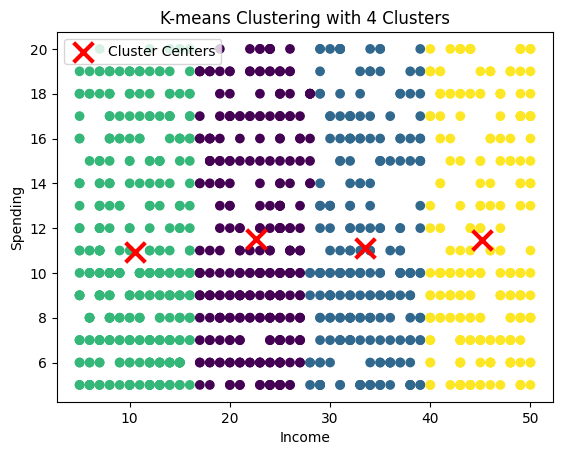

In [10]:
# 使用最佳群數（假設為 4，根據肘部圖調整）
optimal_clusters = 4  # 請根據肘部圖結果修改此值
model = KMeans(init="k-means++", n_clusters=optimal_clusters, random_state=0)
model.fit(X)

# 將分群標籤添加到數據框
dataframe['Cluster'] = model.labels_

# 打印群中心
print("群中心:\n", model.cluster_centers_)

# 打印每個群的平均值
print("\n每個群的平均值:\n", dataframe.groupby('Cluster').mean())

# 繪製分群散點圖（Income vs. Spending）
plt.scatter(X['Income'], X['Spending'], c=model.labels_, cmap='viridis')
plt.scatter(model.cluster_centers_[:, X.columns.get_loc('Income')],
            model.cluster_centers_[:, X.columns.get_loc('Spending')],
            c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title(f'K-means Clustering with {optimal_clusters} Clusters')
plt.legend()
plt.show()